# 感知机算法

## 一、理论

### 1.模型
$f(x) = sign(w\cdot x + b)$

$\operatorname{sign}(x)=\left\{\begin{array}{ll}{+1,} & {x \geqslant 0} \\ {-1,} & {x<0}\end{array}\right.$

给定训练集：

$T=\left\{\left(x_{1}, y_{1}\right),\left(x_{2}, y_{2}\right), \cdots,\left(x_{N}, y_{N}\right)\right\}$
### 2.策略

感知机的损失函数 

$L(w, b)=-\sum_{x_{i} \in M} y_{i}\left(w \cdot x_{i}+b\right)$

---
### 3.算法

随即梯度下降法(Stochastic Gradient Descent)

当实例点被误分类，即位于分离超平面的错误侧，则调整$w$, $b$的值，使分离超平面向该误分类点的一侧移动，直至误分类点被正确分类.

$w = w + \eta y_{i}x_{i}$

$b = b + \eta y_{i}$

## 二、代码

### 1.数据准备

In [11]:
# 导入必要的包
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### (1)加载数据集

In [9]:
iris = sns.load_dataset("iris")
type(iris)  

pandas.core.frame.DataFrame

In [10]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
iris.shape  #查看数据集的大小

(150, 5)

In [13]:
iris.species.value_counts()  #查看标签值一共有几类

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

本文做的是线性二分类模型，iris数据集的的标签类都是按顺序排列的，每个标签类有50行，这里选择前100行作为训练数据。

并且选择sepal_length，sepal_width作为特征来进行训练。

#### (2)标签清洗

In [17]:
df = iris.iloc[:100,[0, 1, -1]]
df

,sepal_length,sepal_width,species
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa
3,4.6,3.1,setosa
4,5.0,3.6,setosa
...,...,...,...
95,5.7,3.0,versicolor
96,5.7,2.9,versicolor
97,6.2,2.9,versicolor
98,5.1,2.5,versicolor


#### (3)标签编码

In [18]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df["species"] = encoder.fit_transform(df["species"]) #将标签设置为0，1, 2样式
df

,sepal_length,sepal_width,species
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
95,5.7,3.0,1
96,5.7,2.9,1
97,6.2,2.9,1
98,5.1,2.5,1


#### (4) 画出分布散点图

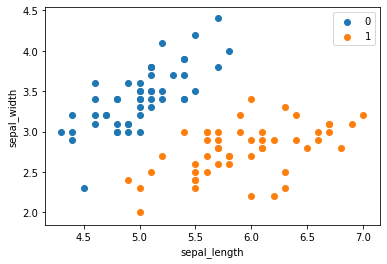

In [20]:
plt.scatter(df[:50]['sepal_length'], df[:50]['sepal_width'], label='0')
plt.scatter(df[50:100]['sepal_length'], df[50:100]['sepal_width'], label='1')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()

#### (5)划分训练集和测试集

In [51]:
from sklearn.model_selection import train_test_split

data = np.array(df)   #将数据类型转换为Numpy数组
X, y = data[:,:-1], data[:,-1]  
y = np.array([1 if i == 1 else -1 for i in y])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)  # 划分训练集和测试集

### 2.感知机算法实现

In [60]:
class Model:
    def __init__(self):
        #初始化w, b和学习率
        self.w = np.ones(2, dtype=np.float32)     
        self.b = 0 
        self.l_rate = 0.01     
        
    def multiply(self, x, w, b):
        y = np.dot(x, w) + b      
        return y
    
    #模型训练，随机梯度下降
    def model_fit(self, X_train, y_train):
        print("start to fit")
        flag = True
        while flag:
            wrong_count = 0
            for i in range(len(X_train)):
                X = X_train[i]
                y = y_train[i]
                if y * self.multiply(X, self.w, self.b) <= 0:     #判别误分类点
                    self.w = self.w + self.l_rate * np.dot(y, X)   
                    self.b = self.b + self.l_rate * y
                    wrong_count += 1
            if wrong_count == 0:
                flag = False
        print("Model training completed!")
        print("w = {}, b = {}".format(self.w, self.b))  #给出训练后的模型参数
    
    #模型测试，给出正确率
    def model_test(self, X_test, y_test):
        print("start to test")
        m = X_test.shape[0]
        errorCnt = 0
        for i in range(m):
            X = X_test[i]
            y = y_test[i]
            if y * self.multiply(X, self.w, self.b) <= 0:
                errorCnt += 1
        accruRate = 1 - (errorCnt / m)
        print("Model testing completed!")
        print("Accuracy rate is {}".format(accruRate))

In [61]:
perceptron = Model()
perceptron.model_fit(X_train, y_train)
perceptron.model_test(X_test, y_test)

start to fit
Model training completed!
w = [ 0.096 -0.092], b = -0.24000000000000005
start to test
Model testing completed!
Accuracy rate is 1.0


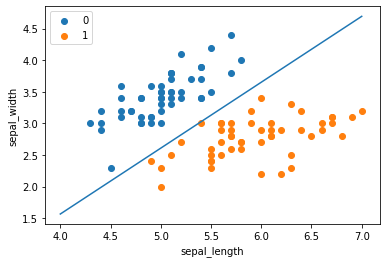

In [59]:
x_points = np.linspace(4, 7, 10)
y_points = -(perceptron.w[0] * x_points + perceptron.b) / perceptron.w[1]
plt.plot(x_points, y_points)

plt.scatter(df[:50]['sepal_length'], df[:50]['sepal_width'], label='0')
plt.scatter(df[50:100]['sepal_length'], df[50:100]['sepal_width'], label='1')
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()

### 参考代码：

1.https://github.com/Dod-o/Statistical-Learning-Method_Code

2.https://github.com/fengdu78/lihang-code